In [1]:
import ast
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import tensorflow as tf
data = open('toy_data', 'r').read()

In [2]:
df = pd.DataFrame(ast.literal_eval(data))
df.head()

,user,comment
0,Scene_Cast2,How do you all monitor air quality?<p>I person...
1,leonroy,Any idea how good the Awair monitors are? I re...
2,spladug,The South Coast (California) Air Quality Manag...
3,PowerfulWizard,Anyone want to review this table and suggest a...
4,bearforcenine,"Based on my reading of the table, the PurpleAi..."


In [3]:
from allennlp.data.tokenizers.word_tokenizer import WordTokenizer
WordTokenizer('okay this')

In [4]:
def removeLinks(data):
    if 'href' in data: # re.sub('https\S+', '', data)
        return np.NaN
    else:
        return data
    
df['cleanComment']=df['comment'].apply(removeLinks).dropna().apply(lambda x: BeautifulSoup(x).get_text())
df = df.dropna()
df['cleanComment'].head()

0    How do you all monitor air quality?I personall...
3    Anyone want to review this table and suggest a...
4    Based on my reading of the table, the PurpleAi...
6    >*Field R2Under the table is definition of R^2...
7               Isn't the table sorted alphabetically?
Name: cleanComment, dtype: object

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
ratings_df = pd.DataFrame(list(map(analyzer.polarity_scores, df.cleanComment)))

In [6]:
df2 = pd.concat([df, ratings_df], axis=1, join='inner').reset_index(drop=True)
df2.head()

,user,comment,cleanComment,neg,neu,pos,compound
0,Scene_Cast2,How do you all monitor air quality?<p>I person...,How do you all monitor air quality?I personall...,0.0,1.000,0.000,0.0000
1,PowerfulWizard,Anyone want to review this table and suggest a...,Anyone want to review this table and suggest a...,0.0,0.799,0.201,0.8425
2,bearforcenine,"Based on my reading of the table, the PurpleAi...","Based on my reading of the table, the PurpleAi...",0.0,1.000,0.000,0.0000
3,9dl,&gt;*Field R2<p>Under the table is definition ...,>*Field R2Under the table is definition of R^2...,0.0,0.922,0.078,0.4939
4,bearforcenine,Isn&#x27;t the table sorted alphabetically?,Isn't the table sorted alphabetically?,0.0,0.814,0.186,0.6249


In [7]:
pd.set_option('display.max_colwidth', 200)

In [8]:
df2.neg.mean()

0.09423076923076923

In [9]:
import seaborn as sns
sns.boxplot(x=df2['neg'], data=df)

In [10]:
def vdir(obj):
    return [x for x in dir(obj) if not x.startswith('_')]

In [11]:
emo_df = pd.read_csv('data/text_emotion.csv')

In [12]:
emo_df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."


In [13]:
emo_df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [14]:
# emotion datasets
# ISEAR
# Tales
# Reddit
# Movie Reviews
# ANET
# SemEval
# DepecheMood # largest
# Word2Vec
# Glove # 
# Elmo for contextualized

In [15]:
# Load the GloVe vector representations for words
glove_size =  25
glove_file = f'data/glove.twitter.27B.{glove_size}d.txt'
embeddings = pd.read_table(glove_file, sep=" ", index_col=0, header=None,quoting=3) # 3 is quote none

embeddings.loc['when']

1    -0.261480
2     0.264400
3     0.448760
4     0.159900
5    -0.476920
6    -0.319420
7     2.156100
8    -0.526340
9    -0.568540
10    0.288940
11   -0.309100
12    0.694520
13   -5.600800
14   -0.184110
15    0.075871
16    0.696570
17    0.359980
18   -0.647240
19    0.347930
20   -0.593300
21    0.576650
22    0.305560
23    0.488150
24   -0.110320
25   -0.780190
Name: when, dtype: float64

In [16]:
embeddings.shape

(1193514, 25)

In [17]:
embeddings.head()

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,,,,,,,,,,,,,,,,,,,,,
<user>,0.62415,0.624760,-0.082335,0.201010,-0.137410,-0.11431,0.77909,2.6356,-0.463510,0.57465,...,-0.94879,-0.017336,-0.863490,-1.33480,0.046811,0.36999,-0.57663,-0.48469,0.400780,0.75345
.,0.69586,-1.146900,-0.417970,-0.022311,-0.023801,0.82358,1.22280,1.7410,-0.909790,1.37250,...,-0.57058,-0.508610,-0.165750,-0.98153,-0.821300,0.24333,-0.14482,-0.67877,0.706100,0.40833
:,1.12420,0.054519,-0.037362,0.100460,0.119230,-0.30009,1.09380,2.5370,-0.072802,1.04910,...,-0.99347,-0.650720,-0.030948,-1.08170,-0.647010,0.32341,-0.41612,-0.52680,-0.047166,0.71549
rt,0.74056,0.915500,-0.163520,0.358430,0.052660,0.14560,1.04210,2.8073,0.128650,1.04920,...,-0.91433,-0.404560,-1.098800,-1.03330,-0.178750,0.37979,-0.25922,-0.74854,0.360010,0.61206
",",0.84705,-1.034900,-0.050419,0.271640,-0.586590,0.99514,0.25267,1.6963,0.103130,0.80073,...,-0.67015,-0.648120,0.010373,-0.71889,-0.749970,0.24862,0.10319,-1.17320,0.581960,0.33846


In [18]:
embeddings.index[0:20]

Index(['<user>', '.', ':', 'rt', ',', '<repeat>', '<hashtag>', '<number>',
       '<url>', '!', 'i', 'a', '"', 'the', '?', 'you', 'to', '(', '<allcaps>',
       '<elong>'],
      dtype='object', name=0)

In [19]:
EMBEDDING_DIM=25
MAXLEN=32

In [20]:
import text
from gensim import corpora
import importlib
from gensim.parsing.preprocessing import STOPWORDS

emo_df['tokens'] = emo_df['content'].apply(text.tokenize)

def get_token_counts(tokens_col):
    token_counts = {}
    for tokens in tokens_col:
        for token in tokens:
            if not token in token_counts.keys():
                token_counts[token] = 1
            else:
                token_counts[token] += 1
    return token_counts

In [21]:
from nn import * # import neural network functions
emo_df = load_file('emo_df.pickle')
top_words = load_file('top_words.pickle')
token_embeddings = load_file('embeddings.pickle')
id2word=corpora.Dictionary(emo_df['tokens2'])

In [23]:
top_words[15:17]

,word_index,word,word_count
15,15,sinus,10
16,16,stupid,492


In [24]:
emo_df.head(2)

,tweet_id,sentiment,author,content,tokens,tokens2
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,"[@tiffanylue, know, listenin, bad, habit, earlier, started, freakin, =, []","[know, listenin, bad, habit, earlier, started, freakin, =, []"
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,"[Layin, n, bed, headache, ughhhh...waitin, call...]","[n, bed, headache]"


In [25]:
# looks good
assert((token_embeddings[197] == embeddings.loc['hey'].values).all())

In [26]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils
# Old Model with accuracy of around ~55%
# X = token_matrix[0:15_000]
# le = LabelEncoder()
# y = utils.to_categorical(le.fit_transform(emo_df['sentiment']))

# model = create_model(learning_rate=0.005, filter_size=6, out_size=emo_df['sentiment'].nunique())
# model.fit(X,y[0:15_000], verbose=True, epochs=10, batch_size=128, validation_split=0.05) 

In [27]:
# from sklearn.metrics import classification_report, confusion_matrix
# import matplotlib.pyplot as plt 
# n = len(model.history.history['loss'])
# plt.plot(range(n), model.history.history['val_loss'])

In [28]:
# model.save('emotion.model')

In [29]:
# my_test = doc2token_seq('I hate everything aaa I hate you')
# pred = model.predict(np.array([my_test]))
# le.inverse_transform([np.argmax(pred)])

In [30]:
# my_test = doc2token_seq('Wish me luck!')
# pred = model.predict(np.array([my_test]))
# le.inverse_transform([np.argmax(pred)])

In [31]:
# model.summary()

### Daily Dialog Dataset

In [32]:
# Look at Daily Dialog dataset nad see if it can improve the model's accuracy
import os
dd_dir = 'ijcnlp_dailydialog/train'
os.listdir(dd_dir)

['dialogues_act_train.txt',
 'dialogues_emotion_train.txt',
 'dialogues_train.txt']

In [33]:
act_file, emot_file, train_file = map(lambda x: os.path.join(dd_dir, x), os.listdir(dd_dir))
act_file = open(act_file, 'r').read().split('\n')
emot_file = open(emot_file, 'r').read().split('\n')
train_file = open(train_file, 'r').read().split('\n')

In [34]:
all_seqs = []
all_emos = []
# all_acts = []
for line_count, (line_dial, line_emo, line_act) in enumerate(zip(train_file, emot_file, act_file)):
    seqs = line_dial.split('__eou__')
    seqs = seqs[:-1]

    emos = line_emo.split(' ')
    emos = emos[:-1]

#    acts = line_act.split(' ')
#    acts = acts[:-1]
    
    all_seqs.append(seqs)
    all_emos.append(emos)
#    all_acts.append(acts)

In [35]:
# daily dialog dataset
import itertools
sentences = list(itertools.chain(*all_seqs))
emotes = list(itertools.chain(*all_emos))

In [37]:
# Loading in the datastes and creating the necssary embeddings
SAMPLE_SIZE = 30_000
needs_update = False

# a bit slow
if needs_update:
    # Load the emotional dataset
    emo_df = load_file('emo_df.pickle')
    emo_df = emo_df.replace({'sentiment' : {'empty' : 0, 'sadness' : 5, 'worry' : 3, 
                                            'fun' : 4, 'happiness' : 4, 'relief' : 4,
                                            'love' : 4, 'boredom' : 0, 'anger' : 1, 
                                            'hate' : 2, 'neutral' : 0, 'enthusiasm' : 4,
                                            'surprise' : 6}})
    emo_df = emo_df[['sentiment', 'content']].sample(SAMPLE_SIZE)
    emo_df = emo_df.rename(columns={'content' : 'sentence', 'sentiment' : 'emote'})
    # Load in some other emotional data, focused around the individual
    more_emotes = pd.read_csv('data/emotion.data').iloc[:,1:] # skip the id column
    more_emotes = more_emotes.replace({'emotions' : 
                         {'sadness' : 5, 
                          'joy' : 4, 
                          'love' : 4,
                          'anger' : 1,
                          'fear' : 3,
                          'surprise' : 6}})
    more_emotes = more_emotes.rename(columns={'text' :'sentence', 'emotions' : 'emote'}).sample(SAMPLE_SIZE)
    
    # Setup the daily dialog dataset, add in the extra data
    dd_train = pd.DataFrame({'sentence':sentences,
                             'emote':emotes}).sample(SAMPLE_SIZE)
    # merge together the datasets
    dd_train = dd_train.append(more_emotes)
    dd_train = dd_train.append(emo_df)
    dd_train['emote'] = dd_train['emote'].astype(int)
    dd_train['tokens'] = dd_train['sentence'].apply(text.tokenize)

    # filter the tokens only which have embeddings
    dd_train['tokens'] = dd_train['tokens'].apply(lambda x: filter_tokens(embeddings.index, x)) 
    
    # Get token embeddings for the words in the corpus and store those for use in the 
    # embedding layer in the neural net. GloVe (Global Vectors for Word Representation) embeddings.
    id2word=corpora.Dictionary(dd_train['tokens'])
    id2word.filter_extremes(no_below=3)
    update_id2word(id2word)
    token_counts = pd.DataFrame(get_token_counts(dd_train['tokens']).items(), columns=['word', 'word_count'])
    top_words = pd.DataFrame(id2word.items(), columns=['word_index', 'word'])
    top_words = top_words.merge(token_counts, on='word')
    # filter out some of the uncommon tokens
    dd_train['tokens'] = dd_train['tokens'].apply(lambda x: filter_tokens(top_words['word'].values, x)) 
    
    # get embeddings
    token_seqs = dd_train['tokens'].apply(lambda tokens: get_token_seqs(tokens))
    token_embeddings = top_words['word'].apply(lambda word: embeddings.loc[word])

    # save everything
    # update id2word used by get_token_seqs
    save_file('id2word.pickle', id2word)
    save_file('top_words.pickle', top_words)
    save_file('dd_train.pickle', dd_train)
    save_file('token_seqs.pickle', token_seqs)
    save_file('token_embeddings.pickle', token_embeddings)
else:
    dd_train = load_file('dd_train.pickle')
    top_words = load_file('top_words.pickle')
    token_seqs = load_file('token_seqs.pickle')
    token_embeddings = load_file('token_embeddings.pickle')
    id2word = load_file('id2word.pickle')

/home/me/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


[i] Saved to file: id2word.pickle
[i] Saved to file: top_words.pickle
[i] Saved to file: dd_train.pickle
[i] Saved to file: token_seqs.pickle
[i] Saved to file: token_embeddings.pickle


In [39]:
token_embeddings

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,0.84705,-1.034900,-0.050419,0.271640,-0.586590,0.99514,0.25267,1.696300,0.103130,0.80073,...,-0.670150,-0.648120,0.010373,-0.71889,-0.749970,0.248620,0.103190,-1.173200,0.58196,0.33846
1,0.69586,-1.146900,-0.417970,-0.022311,-0.023801,0.82358,1.22280,1.741000,-0.909790,1.37250,...,-0.570580,-0.508610,-0.165750,-0.98153,-0.821300,0.243330,-0.144820,-0.678770,0.70610,0.40833
2,-0.98126,0.458230,0.201170,-0.405540,-0.976080,-0.54941,0.94278,0.072537,-0.371080,0.12274,...,0.723650,-0.501790,-0.495010,-1.10370,-0.997580,0.277280,0.218630,1.034900,0.16152,0.37009
3,-0.32929,-0.160370,0.107850,-0.396100,-0.488270,-0.17528,0.23056,-0.491150,-0.065798,0.84382,...,0.364940,-0.004254,0.966870,-1.56740,-0.404540,-0.795570,-0.005053,0.021972,-0.73638,0.65277
4,-0.32909,0.402210,-0.810000,-0.373790,-0.910750,-1.49610,1.71340,0.902960,-0.930520,0.23089,...,0.194300,-0.191760,-1.686800,-0.40934,-0.533340,-0.277250,-0.865530,-0.163710,0.89115,-0.74183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13355,-1.11140,-0.280430,1.616600,0.138530,-0.723320,-1.07560,-0.23833,-1.146600,0.457850,-1.92520,...,0.815150,0.182940,0.144070,0.25641,1.130300,0.791030,1.032600,-0.808720,-0.37643,0.45173
13356,-0.19519,-1.341900,0.997720,-0.807040,0.079999,-1.22180,0.93940,1.719000,0.819370,1.20430,...,0.110580,1.593800,-0.143640,-0.47006,-0.056109,-1.057300,1.351200,0.286440,1.27390,-0.90654
13357,-0.79130,-0.315040,0.674080,0.145770,-0.785070,0.12570,-0.22798,0.320850,0.161670,-1.32910,...,-0.091453,-0.248020,-0.061035,0.73830,1.114000,-0.525470,0.329720,0.042594,-0.26669,-0.38621
13358,-0.40480,0.223590,1.316500,-0.957940,0.280500,-0.48804,1.85070,0.198420,-0.630100,-0.61487,...,0.423620,0.559940,-0.864110,-0.46372,1.258700,-0.457300,0.115480,0.532610,-0.50871,0.34216


In [40]:
top_words

,word_index,word,word_count
0,0,",",25075
1,1,.,75589
2,2,come,1322
3,3,in,14057
4,4,please,1272
...,...,...,...
13355,13355,montanna,3
13356,13356,pala,3
13357,13357,calvin,3
13358,13358,throwback,3


In [41]:
# Create the token matrix from the sentences

token_matrix = np.zeros((len(token_seqs), MAXLEN))
for i, token_seq in enumerate(token_seqs):
    token_matrix[i] = token_seq

In [42]:
np.hstack([np.random.random((25, 2)), 
  token_embeddings[0:3].T]).T

array([[ 0.01446164,  0.4703781 ,  0.43932216,  0.55233676,  0.02891891,
         0.92247504,  0.20379483,  0.74396067,  0.87295721,  0.32212421,
         0.54908864,  0.79422168,  0.72315875,  0.77089404,  0.06803678,
         0.9024972 ,  0.18827808,  0.9008275 ,  0.678065  ,  0.70644177,
         0.69787192,  0.858033  ,  0.12529439,  0.24855894,  0.53692943],
       [ 0.10950312,  0.28796521,  0.46431358,  0.89759107,  0.37106506,
         0.81462702,  0.814373  ,  0.70862121,  0.12932456,  0.16117888,
         0.54312971,  0.47464406,  0.51010857,  0.52814441,  0.73896713,
         0.29778308,  0.38799261,  0.7065847 ,  0.51547727,  0.21530675,
         0.7970639 ,  0.02145494,  0.20971331,  0.53879638,  0.44602427],
       [ 0.84705   , -1.0349    , -0.050419  ,  0.27164   , -0.58659   ,
         0.99514   ,  0.25267   ,  1.6963    ,  0.10313   ,  0.80073   ,
         0.74655   , -1.2667    , -4.036     , -0.22557   ,  0.16322   ,
        -0.67015   , -0.64812   ,  0.010373  , -0

In [43]:
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Conv1D, Dropout, Concatenate, Flatten, MaxPooling1D, Dense, Input
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

# Neural Network which uses Bidirectional LSTMs and convolutional layers 
# to will hopefully extract some of the contextual information 
# from the sentence. A BiLSTM can get information from forward and backward
# states and the convolutions should also help capture some of context.
def create_model(learning_rate, filter_size, out_size):
    # an embeded sentence
    inputs = Input((MAXLEN,), dtype='int32') 
    
    embedded = Embedding(len(top_words),
                            EMBEDDING_DIM,
                            # add an extra row for 0 in the embedding, since 0 in the token sequences
                            # represents an unknown elemement, and 1 represents the first element
                            weights=[token_embeddings],
                            input_length=MAXLEN,
                            trainable=True)(inputs)
    
    # LSTMs
    l_d0 = Dense(1024, activation='relu')(embedded)
    l_d_drop = Dropout(0.2)(l_d0)
    l_lstm1 = Bidirectional(LSTM(12,return_sequences=True,dropout=0.15, recurrent_dropout=0.0))(l_d_drop)
    l_lstm2 = Bidirectional(LSTM(12,return_sequences=True,dropout=0.15, recurrent_dropout=0.0))(l_lstm1)
    l_lstm_last = Bidirectional(LSTM(12,return_sequences=True,dropout=0.15, recurrent_dropout=0.0))(l_lstm2)
    
    # Covolutions
    l_conv_4f = Conv1D(filters=filter_size,kernel_size=4,activation='relu',kernel_regularizer=regularizers.l2(0.0001))(embedded)
    l_conv_4f = Dropout(0.2)(l_conv_4f)

    l_conv_3f = Conv1D(filters=filter_size,kernel_size=3,activation='relu',)(embedded)
    l_conv_3f = Dropout(0.2)(l_conv_3f)

    l_conv_2f = Conv1D(filters=filter_size,kernel_size=2,activation='relu')(embedded)
    l_conv_2f = Dropout(0.2)(l_conv_2f)

    conv_2 = [l_conv_4f, l_conv_3f, l_conv_2f]

    l_merge_2 = Concatenate(axis=1)(conv_2)
    l_c_lstm = Bidirectional(LSTM(12,return_sequences=True,dropout=0.3, recurrent_dropout=0.0))(l_merge_2)

    # Merge LSTM and Covolutions
    l_merge = Concatenate(axis=1)([l_lstm_last, l_c_lstm])
    l_pool = MaxPooling1D(4)(l_c_lstm)
    l_drop = Dropout(0.2)(l_pool)
    
    l_flat = Flatten()(l_drop) #l_drop)
    l_dense = Dense(256, activation='relu')(l_flat)
    l_drop = Dropout(0.2)(l_dense)
    l_dense2 = Dense(128, activation='relu')(l_drop)
    l_dense_last = Dense(32, activation='relu')(l_dense2)
    
    output = Dense(out_size,
                          activation='softmax')(l_dense)
    model = Model(inputs=inputs, outputs=output)
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], learning_rate=learning_rate)
    return model
    

In [44]:
from tensorflow.keras.models import load_model
random_indexes = pd.DataFrame(token_matrix).sample(frac=0.9).index.to_numpy()

# Set up the data for the model
X = token_matrix[random_indexes]
X_val = token_matrix[~random_indexes]
le = LabelEncoder()
y = utils.to_categorical(le.fit_transform(dd_train['emote']))
y_train = y[random_indexes] 
y_val = y[~random_indexes]
token_matrix[random_indexes]

# Fit the model
if needs_update:
    model = create_model(learning_rate=0.001, filter_size=12, out_size=dd_train['emote'].nunique())
    model.fit(X,y_train, verbose=True, epochs=15, batch_size=128, validation_split=0.05)
    model.save('emote_model')
else:
    model = load_model('emote_model')

Train on 76950 samples, validate on 4050 samples
Epoch 1/15
76950/76950 [==============================] - 30s 392us/sample - loss: 1.2539 - accuracy: 0.5404 - val_loss: 1.0630 - val_accuracy: 0.6175
Epoch 2/15
76950/76950 [==============================] - 25s 330us/sample - loss: 1.0198 - accuracy: 0.6296 - val_loss: 0.9527 - val_accuracy: 0.6514
Epoch 3/15
76950/76950 [==============================] - 26s 335us/sample - loss: 0.9146 - accuracy: 0.6694 - val_loss: 0.8306 - val_accuracy: 0.7104
Epoch 4/15
76950/76950 [==============================] - 26s 335us/sample - loss: 0.8208 - accuracy: 0.7095 - val_loss: 0.7925 - val_accuracy: 0.7277
Epoch 5/15
76950/76950 [==============================] - 26s 334us/sample - loss: 0.7664 - accuracy: 0.7278 - val_loss: 0.7725 - val_accuracy: 0.7294
Epoch 6/15
76950/76950 [==============================] - 25s 325us/sample - loss: 0.7318 - accuracy: 0.7402 - val_loss: 0.7588 - val_accuracy: 0.7343
Epoch 7/15
76950/76950 [=====================

In [45]:
# Evaluating the model
y_preds = model.predict(X_val)
y_pred_labels = np.array(list(map(lambda y_pred: np.argmax(y_pred), y_preds)))
y_test_labels = dd_train.iloc[~random_indexes].emote.values

In [47]:
assert y_test_labels.shape == y_pred_labels.shape

In [48]:
y_df = pd.DataFrame({'true':y_test_labels,'pred': y_pred_labels}, columns=['true', 'pred'])
y_df.head(20)

,true,pred
0,0,0
1,3,0
2,5,5
3,1,1
4,4,0
5,0,0
6,5,5
7,3,3
8,5,5
9,0,0


In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_df['true'], y_df['pred']))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83     28779
           1       0.92      0.89      0.90      4131
           2       0.42      0.39      0.40      1003
           3       0.65      0.61      0.63      8920
           4       0.84      0.82      0.83     23740
           5       0.88      0.74      0.80     11553
           6       0.75      0.38      0.50      2874

    accuracy                           0.80     81000
   macro avg       0.75      0.67      0.70     81000
weighted avg       0.80      0.80      0.79     81000



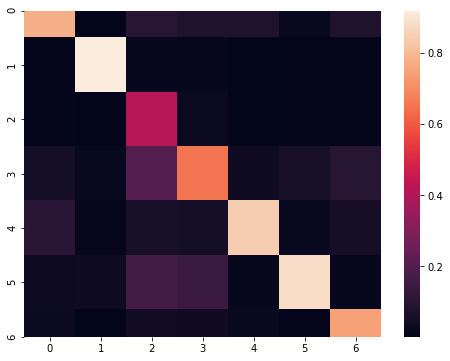

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_df['true'], y_df['pred'])
sns.heatmap(cm / cm.sum(axis=0))

In [51]:
my_test = doc2token_seq('I hate everything aaa I hate you')
pred = model.predict(np.array([my_test]))
# todo tabulate
# 0 no emotion
# 1 anger
# 2 disgust
# 3 fear
# 4 happiness
# 5 sadness
# 6 surprise

# predict disgust
np.argmax(pred)

2

In [52]:
# predict no emotion
my_test = doc2token_seq('Wish me luck!')
pred = model.predict(np.array([my_test]))
np.argmax(pred)

0

In [53]:
# predicts sadness
my_test = doc2token_seq('I am happy, but am I am sad.')
pred = model.predict(np.array([my_test]))
np.argmax(pred)

5

In [54]:
# predicts fear
my_test = doc2token_seq('the world is so cruel...')
pred = model.predict(np.array([my_test]))
np.argmax(pred)

3

In [55]:
# predicts disgust
my_test = doc2token_seq("you are such an idiot!!!")
pred = model.predict(np.array([my_test]))
np.argmax(pred)

3